<a href="https://colab.research.google.com/github/Natalia-git97/Coursera_Capstone/blob/main/IBM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praias de Florianópolis

Este notebook tem como objetivo apresentar uma clusterização das praias de florianópolis com base na infraestrutura. Desta forma, um eventual turista poderá identificar em qual praia gostaria de se hospedar, seja em uma praia mais tranquila, ou em uma praia que ofereça mais opções de atividades.

In [31]:
#Packages
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

## Web Scrapping

Para listar o nome das praias, iremos utilizar os dados fornecidos pelo site do [Guia Floripa](https://guiafloripa.com.br/turismo/praias)

In [32]:
from bs4 import BeautifulSoup

url = 'https://guiafloripa.com.br/turismo/praias'
html = requests.get(url).content

In [33]:
soup = BeautifulSoup(html, 'html.parser')

In [34]:
praias = []
divisao = soup.find_all('ol')
for div in divisao:
  row = div.find_all('li')
  for x in row:
    z = x.find('a')
    praias.append(z.text)

print('O númerro de praias em Florianópolis é de {}.'.format(len(praias)))
praias

O númerro de praias em Florianópolis é de 34.


['Cachoeira do Bom Jesus',
 'Cacupé',
 'Canasvieiras',
 'Daniela',
 'Ingleses',
 'Jurerê Internacional',
 'Jurerê Tradicional',
 'Lagoinha',
 'Ponta das Canas',
 'Praia Brava',
 'Praia do Forte',
 'Praia do Santinho',
 'Sambaqui',
 'Santo Antônio de Lisboa',
 'Barra da Lagoa',
 'Praia da Galheta',
 'Lagoa da Conceição',
 'Praia da Joaquina',
 'Praia do Gravatá',
 'Praia do Moçambique',
 'Praia Mole',
 'Prainha da Barra da Lagoa',
 'Praia da Lagoinha do Leste',
 'Praia do Morro das Pedras',
 'Praia do Pântano do Sul',
 'Praia dos Açores',
 'Praia da Armação',
 'Praia da Solidão',
 'Praia do Campeche',
 'Praia do Saquinho',
 'Praia do Matadeiro',
 'Praia de Naufragados',
 'Ribeirão da Ilha',
 'Tapera']

##Geopy
Para encontrarmos a localização destas praias, utilizaremos a ferreamenta fornecida pelo geopy

In [35]:
#Antes disso, nós precisamos tratar os nomes das praias, pra que fiquem escritos da maneira que é entendido pela ferramenta de localização.

beachs = []
for i in praias:
  beachs.append (i+', SC') #acrescentando a sigla do estado

beachs

['Cachoeira do Bom Jesus, SC',
 'Cacupé, SC',
 'Canasvieiras, SC',
 'Daniela, SC',
 'Ingleses, SC',
 'Jurerê Internacional, SC',
 'Jurerê Tradicional, SC',
 'Lagoinha, SC',
 'Ponta das Canas, SC',
 'Praia Brava, SC',
 'Praia do Forte, SC',
 'Praia do Santinho, SC',
 'Sambaqui, SC',
 'Santo Antônio de Lisboa, SC',
 'Barra da Lagoa, SC',
 'Praia da Galheta, SC',
 'Lagoa da Conceição, SC',
 'Praia da Joaquina, SC',
 'Praia do Gravatá, SC',
 'Praia do Moçambique, SC',
 'Praia Mole, SC',
 'Prainha da Barra da Lagoa, SC',
 'Praia da Lagoinha do Leste, SC',
 'Praia do Morro das Pedras, SC',
 'Praia do Pântano do Sul, SC',
 'Praia dos Açores, SC',
 'Praia da Armação, SC',
 'Praia da Solidão, SC',
 'Praia do Campeche, SC',
 'Praia do Saquinho, SC',
 'Praia do Matadeiro, SC',
 'Praia de Naufragados, SC',
 'Ribeirão da Ilha, SC',
 'Tapera, SC']

In [36]:
latitude = []
longitude = []
location = []
endereco =[]

from geopy.geocoders import Nominatim

for i in beachs:
  try:
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(i)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    endereco.append(i)
  except:
    pass

In [37]:
df = pd.DataFrame()

df['Praias'] = endereco
df['Latitude'] = latitude
df['Longitude'] = longitude

df


,Praias,Latitude,Longitude
0,"Cachoeira do Bom Jesus, SC",-27.426531,-48.423675
1,"Cacupé, SC",-27.537201,-48.524557
2,"Canasvieiras, SC",-27.429567,-48.460244
3,"Daniela, SC",-27.448954,-48.531250
4,"Ingleses, SC",-27.443666,-48.397142
5,"Jurerê Internacional, SC",-27.440266,-48.502748
6,"Jurerê Tradicional, SC",-27.441564,-48.491754
7,"Lagoinha, SC",-27.252150,-50.557237
8,"Ponta das Canas, SC",-27.396429,-48.427428
9,"Praia Brava, SC",-27.397613,-48.415825


##Tratamento de Dados
As latitudes das praias de Florianópolis variam na faixa de -27.
Para os pontos em que a latitude foge desta variação, são pontos em que o geopy encontrou tal endereço em outras regiões.
Pode-se notar que a praia de Naufragados, não se encontra nem mesmo no Brasil. Para isso, vamos fazer uma correção manual destes pontos.

In [38]:
df_out = df.loc[(df['Latitude'])>-27]
df_out

,Praias,Latitude,Longitude
10,"Praia do Forte, SC",-26.168858,-48.534342
18,"Praia do Gravatá, SC",-26.841915,-48.631192
31,"Praia de Naufragados, SC",39.873143,-8.972437
33,"Tapera, SC",-26.286566,-48.590092


Uma consulta no site [A distancia entre](https://www.adistanciaentre.com/Latitude-Longitude.aspx), nos mostrou a latitude e longitude correta destes lugares.

O qual iremos adicionar no dataframe

In [39]:
#Removendo os valores incorretos
df = df.drop(df_out.index)

#Adicionando os valores corretos
df.loc[34]=[ 'Praia do Forte, SC', -27.4319, -48.5173]
df.loc[35]=[ 'Praia do Gravatá, SC', -27.6133, -48.5173]
df.loc[36]=[ 'Praia do Naugragados, SC', -27.8335, -48.5641]
df.loc[37]=[ 'Praia do Tapera, SC', -27.78944, -48.5609]

In [40]:
df.reset_index(inplace=True, drop=True)
df

,Praias,Latitude,Longitude
0,"Cachoeira do Bom Jesus, SC",-27.426531,-48.423675
1,"Cacupé, SC",-27.537201,-48.524557
2,"Canasvieiras, SC",-27.429567,-48.460244
3,"Daniela, SC",-27.448954,-48.531250
4,"Ingleses, SC",-27.443666,-48.397142
5,"Jurerê Internacional, SC",-27.440266,-48.502748
6,"Jurerê Tradicional, SC",-27.441564,-48.491754
7,"Lagoinha, SC",-27.252150,-50.557237
8,"Ponta das Canas, SC",-27.396429,-48.427428
9,"Praia Brava, SC",-27.397613,-48.415825


##Folium

Vamos printar no mapa de Florianópolis a localização das praias apresentadas acima

In [41]:
#Considerando a localização da capital Florianópolis

address = 'Florianópolis, SC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Florianopolis are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Florianopolis are -27.5973002, -48.5496098.


In [42]:
import folium

# create map of Florianópolis using latitude and longitude values
map_FL = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, praia in zip(df['Latitude'], df['Longitude'], df['Praias']):
    label = '{}'.format(praia)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_FL)  
    
map_FL

## Foursquare API

Agora que temos a localização das praias de Florianópolis, iremos acessar a API do foursquare a fim de explorar o entorno de cada praia, encontrando as categorias de locais mais comuns de cada praia

In [43]:
#Define Foursquare credentials and version

CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
ACCESS_TOKEN = #your acess token
VERSION = #your version
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Praias', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
#Chamando a função
Praias_venues = getNearbyVenues(names=df['Praias'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Como resultado, a tabela a seguir apresenta os lugares encontrados próximos a cada praia

In [47]:
print(Praias_venues.shape)
Praias_venues

(330, 7)


,Praias,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Cachoeira do Bom Jesus, SC",-27.426531,-48.423675,Confiance Restaurante,-27.426191,-48.424464,Buffet
1,"Cachoeira do Bom Jesus, SC",-27.426531,-48.423675,Panificadora União,-27.426834,-48.423778,Bakery
2,"Cachoeira do Bom Jesus, SC",-27.426531,-48.423675,Santa Pizzaria e Restaurante,-27.426198,-48.424431,Pizza Place
3,"Cachoeira do Bom Jesus, SC",-27.426531,-48.423675,Mercado Petroski,-27.426307,-48.425374,Grocery Store
4,"Cachoeira do Bom Jesus, SC",-27.426531,-48.423675,Lanches Do Jorge,-27.425907,-48.424526,Diner
...,...,...,...,...,...,...,...
325,"Praia do Naugragados, SC",-27.833500,-48.564100,Costão de Naufragados,-27.833845,-48.561186,Scenic Lookout
326,"Praia do Naugragados, SC",-27.833500,-48.564100,Bar e Restaurante Golfinho,-27.834195,-48.560946,Restaurant
327,"Praia do Naugragados, SC",-27.833500,-48.564100,Restaurante Andrino,-27.834313,-48.560815,Seafood Restaurant
328,"Praia do Tapera, SC",-27.789440,-48.560900,Praia da Tapera do Sul,-27.790472,-48.560257,Beach


In [48]:
N_venues = Praias_venues.groupby('Praias').count()
print(N_venues.shape)
N_venues

(31, 6)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Praias,,,,,,
"Barra da Lagoa, SC",30,30,30,30,30,30
"Cachoeira do Bom Jesus, SC",5,5,5,5,5,5
"Cacupé, SC",8,8,8,8,8,8
"Canasvieiras, SC",30,30,30,30,30,30
"Daniela, SC",6,6,6,6,6,6
"Ingleses, SC",8,8,8,8,8,8
"Jurerê Internacional, SC",30,30,30,30,30,30
"Jurerê Tradicional, SC",29,29,29,29,29,29
"Ponta das Canas, SC",11,11,11,11,11,11


## Clusterização

Vamos fazer a clusterização das praias baseado no número de lugares encontrados próximos a cada praia. Assim, praias com o maior número de *venues* possui maior infraestrutura. Praias com pouco *venues* são consideradas desertas.

Para clusterização, utilizaremos o método *Kmeans*

In [49]:
from sklearn.cluster import KMeans 

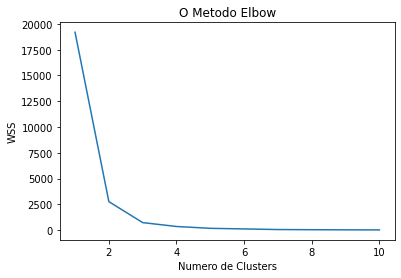

In [50]:
#Utilizaremos o método Elbow para verificar qual o melhor número de clusters para realização da clusterização

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(N_venues)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

De acordo com o gráfico, o número de cluster igual a 3 é o inidicado para realizar a clusterização dessa base de dados

In [51]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(N_venues)

# check cluster labels generated for each row in the dataframe
kmeans_labels = kmeans.labels_

Vamos montar um dataframe que apresente as praias, com suas respecitivas latitudes e longitudes, assim como o número de venues encontrados e a qual cluster determinada praia pertence.

In [52]:
sett = df.set_index('Praias')
N_venues_cluster = pd.merge(N_venues,sett, on='Praias')
N_venues_cluster.insert(0,'Cluster Label', kmeans_labels)
N_venues_cluster.reset_index(inplace=True)

In [53]:
N_venues_cluster.drop(columns={'Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'}, inplace=True)

In [54]:
N_venues_cluster

,Praias,Cluster Label,Venue Category,Latitude,Longitude
0,"Barra da Lagoa, SC",1,30,-27.574778,-48.425835
1,"Cachoeira do Bom Jesus, SC",0,5,-27.426531,-48.423675
2,"Cacupé, SC",0,8,-27.537201,-48.524557
3,"Canasvieiras, SC",1,30,-27.429567,-48.460244
4,"Daniela, SC",0,6,-27.448954,-48.531250
5,"Ingleses, SC",0,8,-27.443666,-48.397142
6,"Jurerê Internacional, SC",1,30,-27.440266,-48.502748
7,"Jurerê Tradicional, SC",1,29,-27.441564,-48.491754
8,"Ponta das Canas, SC",2,11,-27.396429,-48.427428
9,"Praia Brava, SC",2,13,-27.397613,-48.415825


## Mapa Clusterizado

Por fim, vamos apresentar o mapa de Florianópolis, com a localização de todas as praias clusterizadas

In [55]:
colors={0:'red',1:'blue',2:'green'}

# create map of Ontario using latitude and longitude values
map_SC = folium.Map(location=[latitude, longitude],zoom_start=10)

# add markers to map
for lat, lng, praia, clusters in \
  zip(N_venues_cluster['Latitude'], N_venues_cluster['Longitude'], N_venues_cluster['Praias'], N_venues_cluster['Cluster Label']):
    label = '{}, cluster {}'.format(praia,clusters)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[clusters],
        fill=True,
        fill_color=colors[clusters],
        fill_opacity=0.7,
        parse_html=False).add_to(map_SC)  
    
map_SC

##Examine Clusters

Agora, com as praias já clusterizadas vamos examinar cada cluster a fim de identificar o critério de agrupamento de cada cluster 

In [56]:
#Cluster 0
cluster0 = N_venues_cluster[N_venues_cluster['Cluster Label'] == 0]
cluster0

,Praias,Cluster Label,Venue Category,Latitude,Longitude
1,"Cachoeira do Bom Jesus, SC",0,5,-27.426531,-48.423675
2,"Cacupé, SC",0,8,-27.537201,-48.524557
4,"Daniela, SC",0,6,-27.448954,-48.531250
5,"Ingleses, SC",0,8,-27.443666,-48.397142
11,"Praia da Armação, SC",0,8,-27.736035,-48.507903
12,"Praia da Galheta, SC",0,2,-27.593527,-48.426915
13,"Praia da Lagoinha do Leste, SC",0,1,-27.774022,-48.486880
14,"Praia da Solidão, SC",0,3,-27.793965,-48.533928
15,"Praia do Campeche, SC",0,4,-27.671869,-48.477448
17,"Praia do Gravatá, SC",0,4,-27.613300,-48.517300


Forma o agrupamento das praias consideradas desertas, com menor infraestrutura. No quais as opções de lugares encontrados próximos a essas praias variam de 1 a 7

In [57]:
#Cluster 1
cluster1 = N_venues_cluster[N_venues_cluster['Cluster Label'] == 1]
cluster1

,Praias,Cluster Label,Venue Category,Latitude,Longitude
0,"Barra da Lagoa, SC",1,30,-27.574778,-48.425835
3,"Canasvieiras, SC",1,30,-27.429567,-48.460244
6,"Jurerê Internacional, SC",1,30,-27.440266,-48.502748
7,"Jurerê Tradicional, SC",1,29,-27.441564,-48.491754
27,"Prainha da Barra da Lagoa, SC",1,30,-27.574137,-48.421103
30,"Santo Antônio de Lisboa, SC",1,30,-27.506151,-48.518870


Neste cluster, estão agrupadas as praias que possuem uma maior infraestrutura. Com um maior número de opções de lugares para visitar. São consideras as praias mais tops

In [58]:
#Cluster 2
cluster2 = N_venues_cluster[N_venues_cluster['Cluster Label'] == 2]
cluster2

,Praias,Cluster Label,Venue Category,Latitude,Longitude
8,"Ponta das Canas, SC",2,11,-27.396429,-48.427428
9,"Praia Brava, SC",2,13,-27.397613,-48.415825
10,"Praia Mole, SC",2,11,-27.603133,-48.433334
16,"Praia do Forte, SC",2,15,-27.431900,-48.517300
29,"Sambaqui, SC",2,17,-27.492403,-48.526831


Aqui estão agrupadas as praias intermediárias.

Vamos apresentar um  histograma que mostre a média da quantidade de comércios por cluster

In [59]:
n_venues_cluster = pd.DataFrame()
n_venues_cluster['Clusters'] = ['Cluster 0', 'Cluster 1', 'Cluster 2']
n_venues_cluster['Nº Venues'] = [int(cluster0['Venue Category'].mean()),int(cluster1['Venue Category'].mean()),int(cluster2['Venue Category'].mean())]
n_venues_cluster

,Clusters,Nº Venues
0,Cluster 0,4
1,Cluster 1,29
2,Cluster 2,13


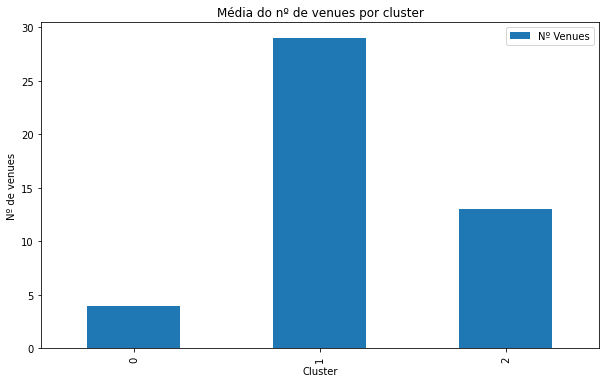

In [60]:
n_venues_cluster.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Nº de venues')
plt.title('Média do nº de venues por cluster')
plt.show()